## Canada Housing Market Exploration

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Data Exploration

In [43]:
h = pd.read_csv('housing.csv')

In [44]:
#first 10 rows of the data frame
h.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [45]:
#column data type info
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
#Numerical Information for each column
h.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Exploration and Visualization

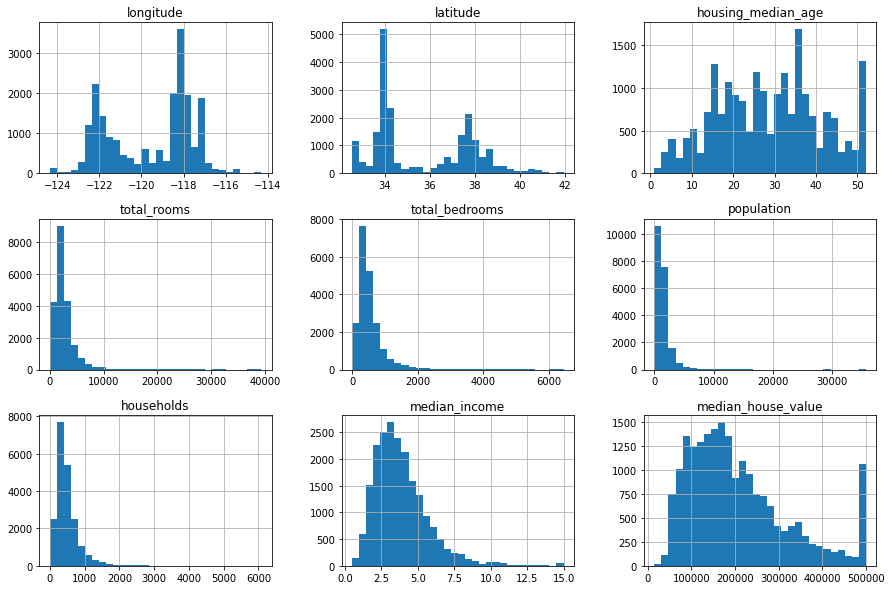

In [47]:
#Histograms of all the features in our data
h.hist(bins=30, figsize=(15,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


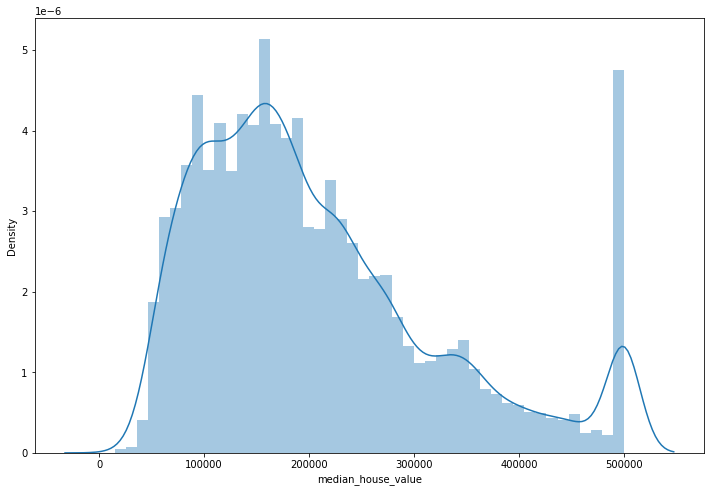

In [48]:
plt.figure(figsize=(12,8))
sns.distplot(h['median_house_value'])

We can tell that the majority of houses are priced withing 1-2 million dollars, with an exeption of a spike at the 5 million dollar mark. Lets look into it...

### Correlation Matrix

In [8]:
#Understanding the correlation between our features to see how related they are.
correlation_matrix = h.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [9]:
#descening value of correlation with median house value.
correlation_matrix['median_house_value'].sort_values(key= abs, ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude             -0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude            -0.045967
population           -0.024650
Name: median_house_value, dtype: float64

In [59]:
h.sort_values('median_house_value',ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10667,-117.88,33.55,27.0,2278.0,316.0,772.0,304.0,10.1275,500001.0,<1H OCEAN
16916,-122.34,37.57,52.0,2635.0,408.0,967.0,374.0,7.0422,500001.0,NEAR OCEAN
16946,-122.33,37.55,33.0,2199.0,312.0,827.0,319.0,6.1349,500001.0,NEAR OCEAN
8877,-118.49,34.04,48.0,2381.0,345.0,859.0,306.0,8.0257,500001.0,<1H OCEAN
8878,-118.50,34.04,52.0,3000.0,374.0,1143.0,375.0,15.0001,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 864x720 with 0 Axes>

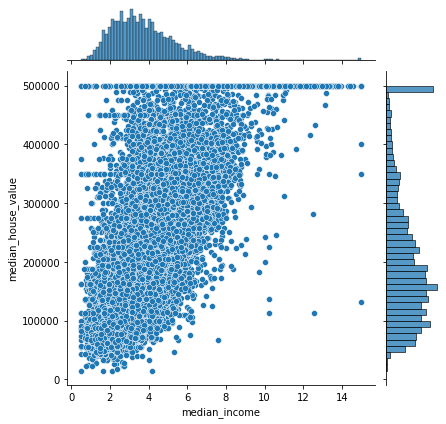

In [62]:
plt.figure(figsize=(12,10))
sns.jointplot('median_income','median_house_value',h)

In [68]:
(h['median_house_value'] >= 500000).value_counts()

False    19648
True       992
Name: median_house_value, dtype: int64

### There seems to be a discreprencey in the data, the 500k dollar median house value point spans all over the median income spectrum, an no other column seems to have a stronger correlation that median income, so this is alarming! In order to try to somewhat fix up the data, lets remove the lower and upper quarters of this 500000 dollar house anomoly in regards to median income.

In [ ]:
h['income_wholenum'] = h['median_income'].apply(lambda x:x//1)

In [74]:
h['income_wholenum'].nunique()

16

In [81]:
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_wholenum
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,8.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.0


In [103]:
drop_ind1 = h[(h['income_wholenum'] >= 12.0) & (h['median_house_value'] >= 500000.0)].index
drop_ind2 = h[(h['income_wholenum'] <= 4.0) & (h['median_house_value'] >= 500000.0)].index
index_total = drop_ind1.union(drop_ind2)
index_total

Int64Index([   89,   459,   511,   512,   514,  1583,  1586,  1645,  1646,
             1914,
            ...
            18363, 18461, 18464, 20163, 20180, 20273, 20322, 20325, 20436,
            20443],
           dtype='int64', length=337)

In [105]:
h.drop(index=index_total,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 864x720 with 0 Axes>

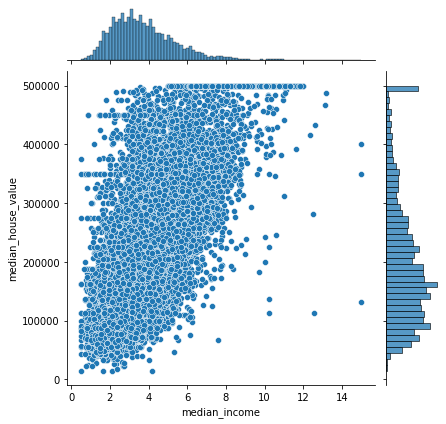

In [106]:
plt.figure(figsize=(12,10))
sns.jointplot('median_income','median_house_value',h)

Better, but still unrealistic like behavior. Notice how uniform the 50000 dollar entries are. But we will work with this, however we need to aknowledge the unrealistic behavior we are seeing

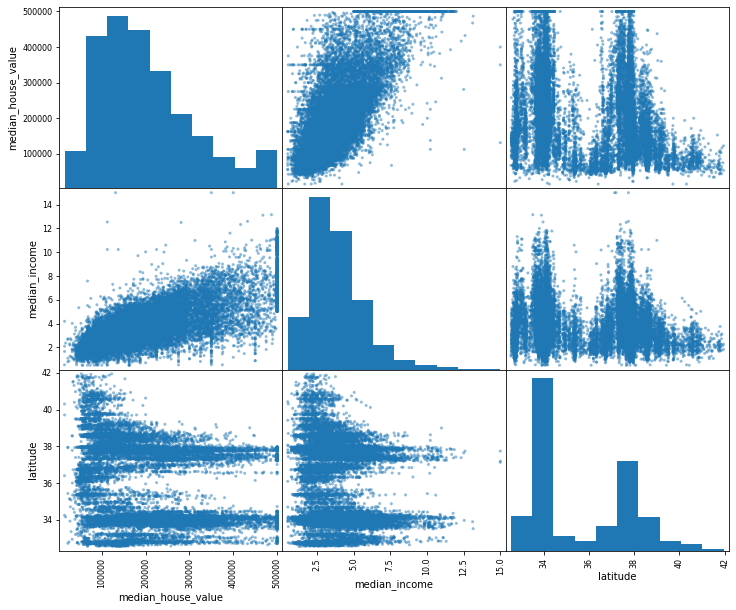

In [107]:
#isolation of top 3 columns wrt median house value
scatter_df = h[['median_house_value','median_income','latitude']]
pd.plotting.scatter_matrix(scatter_df,figsize=(12,10))
plt.show()

The definite correlation between house value and median income!

### Geographic Plotting

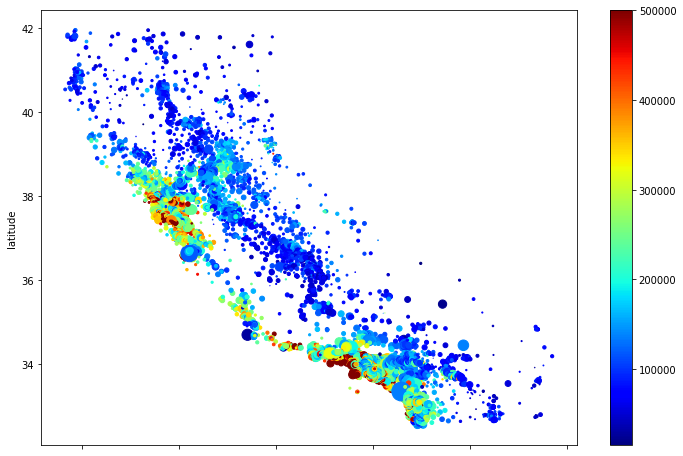

In [109]:
sizes = h['population']/100
colors = h['median_house_value']
h.plot.scatter(x='longitude', y='latitude',s=sizes,c=colors,cmap='jet',figsize=(12,8))

## Data Cleaning and Adjusting

### Fill Missing Values

In [110]:
#Let's check if we have any null values.
h.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        204
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_wholenum         0
dtype: int64

In [111]:
#fill in all the null values with the median of the total bedroom column. This is a method of refilling null values with a central tendency metric.
median_bedroom = h['total_bedrooms'].median()
h.fillna(value=median_bedroom, inplace=True)
h.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_wholenum       0
dtype: int64

In [112]:
# Make three new columns to gain more insight on feature relationships.
h['rooms_per_household'] = h['total_rooms']/ h['households']
h['bedrooms_per_room'] = h['total_bedrooms']/ h['total_rooms']
h['population_per_household'] = h['population']/ h['households']

### Implementing a One Hot Encoder

In [113]:
h['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [114]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
df_OP = h[['ocean_proximity']]
df_OP_1hot = cat_encoder.fit_transform(df_OP)
df_OP_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [115]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [116]:
# Attaching the encoders to each row in our data frame.
h['is_<1H OCEAN'] = df_OP_1hot[:,0]
h['is_INLAND'] = df_OP_1hot[:,1]
h['is_ISLAND'] = df_OP_1hot[:,2]
h['is_NEAR BAY'] = df_OP_1hot[:,3]
h['is_NEAR OCEAN'] = df_OP_1hot[:,4]
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_wholenum,rooms_per_household,bedrooms_per_room,population_per_household,is_<1H OCEAN,is_INLAND,is_ISLAND,is_NEAR BAY,is_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,8.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


In [118]:
h.drop(columns=['ocean_proximity','income_wholenum'],inplace=True)
h

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,is_<1H OCEAN,is_INLAND,is_ISLAND,is_NEAR BAY,is_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209,0.0,1.0,0.0,0.0,0.0


### Train/Test Split

In [137]:
#Splitting the whole DF into testing and training data. Allocating 20% of data points as test data. Median house value is the label we are trying to predict.
from sklearn.model_selection import train_test_split
X = h.drop(columns='median_house_value')
Y = h['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=42)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

## Linear Regression Model

In [121]:
#Fitting a linear regression model
lin_model = LinearRegression().fit(X_train,Y_train)

#Model Evaluation for Training Set
y_train_predict = lin_model.predict(X_train)
rmse_train_lin = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

#Model Evaluation for TESTING Set
y_test_predict = lin_model.predict(X_test)
rmse_test_lin = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [122]:
print("The RMSE for the Linear Regression model is {:.2f}".format(rmse_test_lin))

The RMSE for the Linear Regression model is 62393.43


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


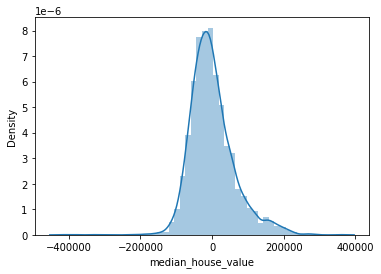

In [123]:
#Plotting the residuals
sns.distplot((Y_test-y_test_predict),bins=50)

## Ridge Regression Model

In [124]:
#Fitting a ridge regression model.
ridge_model = Ridge().fit(X_train,Y_train)

#Model Evaluation for Training Set
y_train_predict_ridge = ridge_model.predict(X_train)
rmse_train_ridge = (np.sqrt(mean_squared_error(Y_train, y_train_predict_ridge)))

#Model Evaluation for TESTING Set
y_test_predict_ridge = ridge_model.predict(X_test)
rmse_test_ridge = (np.sqrt(mean_squared_error(Y_test, y_test_predict_ridge)))

In [125]:
print("The RMSE for the Ridge Regression model is {:.2f}".format(rmse_test_ridge))

The RMSE for the Ridge Regression model is 62386.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


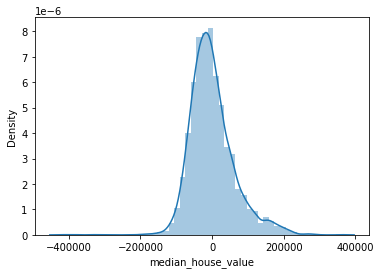

In [126]:
#Plotting the residuals
sns.distplot((Y_test-y_test_predict_ridge),bins=50)

## Support Vector Regression

In [127]:
#Fitting an SVR model.
SVR_model = SVR().fit(X_train,Y_train)

#Model Evaluation for Training Set
y_train_predict_SVR = SVR_model.predict(X_train)
rmse_train_SVR = (np.sqrt(mean_squared_error(Y_train, y_train_predict_SVR)))

#Model Evaluation for TESTING Set
y_test_predict_SVR = SVR_model.predict(X_test)
rmse_test_SVR = (np.sqrt(mean_squared_error(Y_test, y_test_predict_SVR)))


In [128]:
print("The RMSE for the SVR model is {:.2f}".format(rmse_test_SVR))

The RMSE for the SVR model is 112461.32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


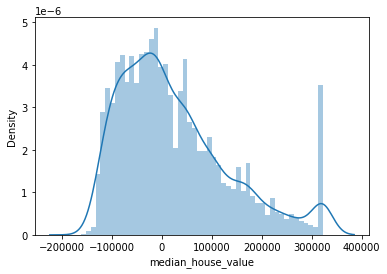

In [129]:
#Plotting the residuals
sns.distplot((Y_test-y_test_predict_SVR),bins=50)

As we saw from our regression model metrics, the RMSE of the SVR model is much higher than the linear and ridge regression RMSE's. The linear and ridge models have a similar RMSE of around $72000 which is decent considering the extremely high housing prices in Canada. Furthermore, from our residual plots, we can see a normal distribution behavior in both the linear and ridge models, which is a good indicator that the model chosen to fit the data is the correct one!